# Solving ODEs with Python

In Python there are several modules that can be used for solving ODEs. Here we use `solve_ivp` from `scipy` and show a few simple examples to get you started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

Consider the system $\dot x(t) = f(t,x)= -x^3+u(t)$ where $x(0)=0$ and $u(t)=sin(t)$. The vector field $f$ is defined as a function:

In [2]:
def f_ode(t, x):
    dx = -x**3+np.sin(t)
    return dx

Define the initial conditions and the time span that you are solving over. The `solve_ivp` `ode45` is a variable timestep solver so the result may not look smooth when you plot it. Use the `t_eval` argument to specify points where you want the solution evaluated.

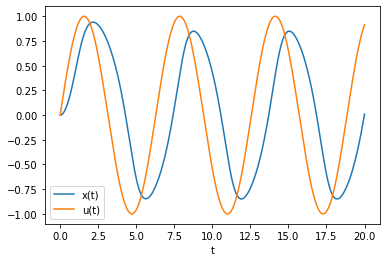

In [3]:
x0 = [0]
tspan = (0, 20)
teval = np.linspace(tspan[0], tspan[1], 1000)
sol = solve_ivp(f_ode, tspan, x0, t_eval=teval)
t = sol.t
x = sol.y[0]
plt.plot(t, x, label='x(t)')
plt.plot(t, np.sin(t), label='u(t)')
plt.legend()
plt.xlabel('t')
plt.show()

## Event handling
When you simulate systems with discontinuities you must be aware that the solution may be inaccurate since the integration might take large steps and miss the discontinuity. Consider for example the following system:

$$\dot x=\left\{\begin{array}{rl}-x^3,&x>0.5\\0,&x\le0.5\end{array}\right.,\quad x(0)=1$$

In [4]:
def f_ode_floor(t, x):
    if x>0.5:
        dx = -x**3
    else:
        dx = 0
    return dx

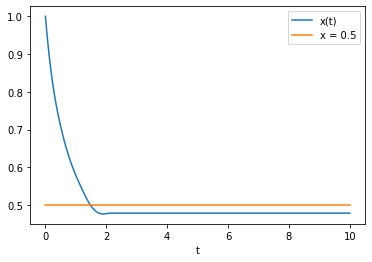

In [5]:
x0 = [1]
tspan = (0, 10)
teval = np.linspace(tspan[0], tspan[1], 1000)
sol = solve_ivp(f_ode_floor, tspan, x0, t_eval=teval)
t = sol.t
x = sol.y[0]
plt.plot(t, x, label='x(t)')
plt.plot(t, t*0+0.5, label='x = 0.5')
plt.legend()
plt.xlabel('t')
plt.show()

This solution is not correct, the state $x$ should stop at $x=0.5$ since then $\dot x=0$. This is handled by event detection. An event function is defined and added to the solver call. For this example we define the value `x[0] - 0.5` which triggers an event when $x$ passes $0.5$. Setting `event.terminal = True` terminates the solver when the event is triggered. Now we can see that the solution correctly determines the discontinuous dynamics at $x=0.5$.

In [6]:
def event(t, x):
    return x[0] - 0.5
event.terminal = True

In [7]:
x0 = [1]
tspan = (0, 10)
teval = np.linspace(tspan[0], tspan[1], 1000)
sol = solve_ivp(f_ode_floor, tspan, x0, t_eval=teval, events=event)
t = sol.t
x = sol.y[0]
# Restart from last solution point, removing the event trigger
x0 = [0.5]
tspan = (t[-1],10)
teval = np.linspace(tspan[0], tspan[1], 1000)
sol = solve_ivp(f_ode_floor, tspan, x0, t_eval=teval)
t = np.hstack((t, sol.t))
x = np.hstack((x, sol.y[0]))

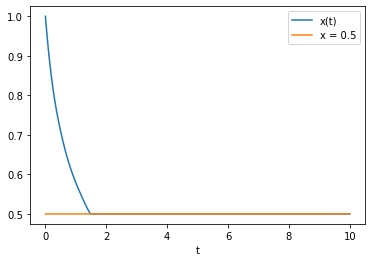

In [8]:
plt.plot(t, x, label='x(t)')
plt.plot(t, t*0+0.5, label='x = 0.5')
plt.legend()
plt.xlabel('t')
plt.show()

# Phase portraits
Phase portraits and vector fields for 2D-systems can be drawn with `control.phase_plot`.

In [9]:
from control import phase_plot

In [47]:
def vdp(_,x):
    # Van der Pol oscillator
    dx1 = x[1]
    dx2 = -x[0]+(1-x[0]**2)*x[1]
    return [dx1, dx2]

def vdp_(x,t):
    # Change order of arguments for use in control.phase_plot()
    return vdp(t,x)

def vdp_scale(x,t):
    # Scale vector field for unit length arrow in vector field
    return vdp_(x,t)/np.linalg.norm(vdp_(x,t))

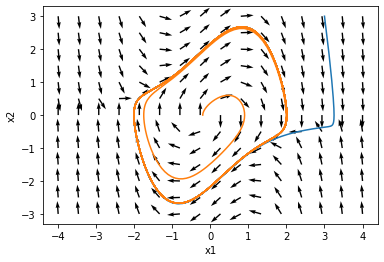

In [48]:
phase_plot(vdp_, X0=[[3,3],[-0.2,0]], T=np.linspace(0,50,1000))
phase_plot(vdp_scale,[-4,4,16],[-3,3,13])

Or with `quiver` and `streamplot`

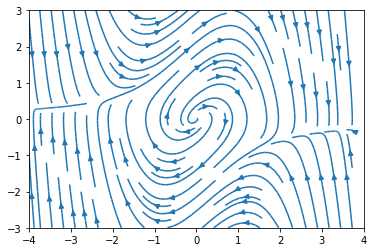

In [49]:
x, y = np.meshgrid(np.linspace(-4,4,16), np.linspace(-3,3,13))
u, v = vdp(_, [x, y])
mag = np.sqrt(u**2 + v**2)
plt.streamplot(x, y, u, v)#, color=mag, linewidth=1, cmap='autumn')
#plt.colorbar()
#plt.quiver(x, y, u/mag, v/mag)
plt.show()